# AI-POWERED CYBER THREAT DETECTION USING MACHINE LEARNING ON NETWORK TRAFFIC DATA


## Authors:
- Lyster Kwamboka
- David Mburu
- Olin Wachira
- Julia Maina
- Denzel Nyakundi

## INTRODUCTION

As digital systems grow more interconnected, the risk of cyberattacks continues to rise. Traditional security systems are no longer sufficient to handle the complexity and scale of modern cyber threats. This project focuses on building an intelligent Intrusion Detection System (IDS) using machine learning, trained on the UNSW-NB15 dataset — a comprehensive and realistic dataset that includes various types of network traffic. The goal is to develop a system that can automatically detect and classify cyberattacks in real time, improving security response and reducing false alerts.

## PROJECT STATEMENT/ CHALLENGES

Current network security systems face increasing difficulty in detecting cyber threats due to their evolving nature. Key issues include:
- High false negative rates, which lead to alert fatigue and wasted analyst time
- Limited adaptability, as rule-based systems fail to detect unknown (zero-day) attacks
- Complex traffic behavior, making it hard to distinguish normal anomalies from malicious actions
- Slow detection times, which give attackers more opportunity to cause harm

Early detection is a major challenge due to the volume, variety, and velocity of modern network data, as well as the imbalance between attack and normal data. This requires more intelligent and automated systems to support threat detection efforts.


## OBJECTIVES

- Explore the distribution of attack types to understand their frequency and severity
- Train machine learning models to classify the kinds of network traffic (normal or the various types of malicious traffic)
- Detect unknown or zero-day attacks using anomaly detection techniques
- Provide clear explanations for model predictions using LIME
- Simulate real-time detection through a stream-based pipeline

## DATA UNDERSTANDING

- Source: Australian Centre for Cyber Security (UNSW Canberra)

- Purpose: Simulates real-world benign and 9 types of malicious network traffic

- Collection Tools: IXIA PerfectStorm (traffic), Argus & Bro/Zeek (feature extraction)

Key Stats:
- Total Records: 2.54 million

- Train Set: 175,341 records

- Test Set: 82,332 records

- Features: 49 (including IP metadata, time-based stats, and content-based attributes)

Labels:

- Normal

- 9 attack types: DoS, Exploits, Reconnaissance, Shellcode, Fuzzers, Analysis, Backdoors, Generic, Worms

## DATA PREPARATION

METHODOLOGY
- The project will follow a structured data science process, including:

Data Inspection:
- Reviewing the dataset, identifying irrelevant features (e.g., IP addresses, ports, timestamps), and retaining 42 features relevant to connection patterns, size, timing, and behavior.

Data Cleaning and Preparation:
- Dropping unnecessary columns, handling missing values, encoding categorical features (e.g., protocol, service, state), normalizing numerical ones, and addressing class imbalance.

Exploratory Data Analysis (EDA):
- Analyzing flow-based features to uncover trends, detect anomalies, and explore correlations between attack categories and network behaviors.

Modeling:
- Training classification models such as Logistic Regression, XGBoost, and Neural Networks. Isolation Forest will be explored for anomaly detection.

Model Evaluation:
- Assessing models using accuracy, recall, F1-score, and confusion matrices.

Interpretation & Explainability:
- Using LIME for model interpretability and feature importance to identify strong indicators of cyber threats.

Deployment:
- Deploying the best model using Streamlit or FastAPI and simulating real-world scenarios using replayed network traffic from .pcap files.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, recall_score, ConfusionMatrixDisplay
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import lime
import lime.lime_tabular




In [ ]:
# Import custom classes for loading and cleaning data
from __init__ import Load, Clean

In [ ]:
# Load the dataset and initialize the Load class
loader = Load('Dataset/training_set.csv')

In [ ]:
# Display the first few rows of the dataset
loader.data()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1


In [ ]:
# Display all feature names in the dataset
loader.features()

----------------Features in the Dataset---------------- 

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
# Generate descriptive statistics for numerical features
loader.stats()

----------------Summary Statistics of the Features---------------- 

                 dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+

In [ ]:
# Show info about data types and non-null counts
loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  

In [ ]:
# Initialize the Clean class with the loaded dataset
cleaner = Clean(loader)

In [ ]:
# Check for duplicate rows in the dataset
cleaner.duplicates()

The dataset has 67601 duplicated rows, which are 38.55% of the total data.

 Removing duplicates...

  Duplicates dropped.


In [ ]:
# Check for duplicate rows in the dataset
cleaner.duplicates()

The dataset has no duplicated rows.


In [ ]:
# Show info about data types and non-null counts
loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 107740 entries, 1 to 175338
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                107740 non-null  float64
 1   proto              107740 non-null  object 
 2   service            107740 non-null  object 
 3   state              107740 non-null  object 
 4   spkts              107740 non-null  int64  
 5   dpkts              107740 non-null  int64  
 6   sbytes             107740 non-null  int64  
 7   dbytes             107740 non-null  int64  
 8   rate               107740 non-null  float64
 9   sttl               107740 non-null  int64  
 10  dttl               107740 non-null  int64  
 11  sload              107740 non-null  float64
 12  dload              107740 non-null  float64
 13  sloss              107740 non-null  int64  
 14  dloss              107740 non-null  int64  

In [ ]:
# Detect extraneous or irrelevant values in the dataset
cleaner.check_extraneous()

Column: dur, 
  Unique Values: 
 dur
0.000009    4276
0.000003    2408
0.000008    2243
0.000010    1662
0.000005    1639
            ... 
0.212855       1
0.107970       1
1.539071       1
1.013508       1
1.557125       1
Name: count, Length: 74039, dtype: int64 

Column: proto, 
  Unique Values: 
 proto
tcp     76293
udp     23027
unas     2582
ospf      775
arp       633
        ...  
tlsp       26
ggp        24
igmp       17
icmp       13
rtp         1
Name: count, Length: 133, dtype: int64 

Column: service, 
  Unique Values: 
 service
-           64951
http        18135
dns         11046
smtp         5025
ftp-data     3282
ftp          2691
ssh          1295
pop3         1104
snmp           63
ssl            56
dhcp           55
irc            25
radius         12
Name: count, dtype: int64 

Column: state, 
  Unique Values: 
 state
FIN    74478
INT    19726
CON    12487
REQ      953
RST       83
ECO       10
PAR        1
URN        1
no         1
Name: count, dtype: int64 

Colu

In [ ]:
# Replace or clean the identified extraneous values
cleaner.replace_extraneous()

Extraneous value found in column service: -

 Cleaning service column... 


 Replaced 64951 occurrences of '-' in column 'service' with 'no-service'. 



c:\Users\Lyster\Documents\Flatiron\projects_docs\AI-Powered-CyberThreat-Detection\__init__.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if placeholder in self.df[col].values:


The 'is_ftp_login' column is a binary column but has more than two unique values. We'll drop these extras

In [ ]:
# Check for binary features and validate their encoding
cleaner.binary_check()

Extra values found in 'is_ftp_login': [0 1 2 4] 


 Cleaning is_ftp_login column... 


 is_ftp_login column cleaned.

 Column 'is_sm_ips_ports' has only binary values.


In [ ]:
# Check for binary features and validate their encoding
cleaner.binary_check()


 Column 'is_ftp_login' has only binary values.

 Column 'is_sm_ips_ports' has only binary values.


In [ ]:
# Store the cleaned training dataframe from the cleaner object
df1 = cleaner.df

In [ ]:
# Load the testing dataset using the custom Load class
test_loader = Load('Dataset/testing_set.csv')

In [ ]:
# Preview the first few rows of the testing dataset
test_loader.data()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
# Print column names in the testing dataset
test_loader.features()

----------------Features in the Dataset---------------- 

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
# Generate statistical summary of the testing dataset
test_loader.stats()

----------------Summary Statistics of the Features---------------- 

                dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07

In [ ]:
# Print dataset info including null values and data types
test_loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt       

In [ ]:
# Initialize cleaning operations for the testing dataset
test_cleaner = Clean(test_loader)

In [ ]:
# Check and remove any duplicate rows from the testing dataset
test_cleaner.duplicates()

The dataset has 26387 duplicated rows, which are 32.05% of the total data.

 Removing duplicates...

  Duplicates dropped.


In [ ]:
# Check any duplicate rows from the testing dataset
test_cleaner.duplicates()

The dataset has no duplicated rows.


In [ ]:
# Recheck info after duplicates removal
test_loader.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 55945 entries, 1 to 82329
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                55945 non-null  float64
 1   proto              55945 non-null  object 
 2   service            55945 non-null  object 
 3   state              55945 non-null  object 
 4   spkts              55945 non-null  int64  
 5   dpkts              55945 non-null  int64  
 6   sbytes             55945 non-null  int64  
 7   dbytes             55945 non-null  int64  
 8   rate               55945 non-null  float64
 9   sttl               55945 non-null  int64  
 10  dttl               55945 non-null  int64  
 11  sload              55945 non-null  float64
 12  dload              55945 non-null  float64
 13  sloss              55945 non-null  int64  
 14  dloss              55945 non-null  int64  
 15  sinpkt       

In [ ]:
# Identify and display extraneous or placeholder values in the testing dataset
test_cleaner.check_extraneous()

Column: dur, 
  Unique Values: 
 dur
0.000009    1561
0.000003    1284
0.000008    1255
0.000010    1092
0.000004    1062
            ... 
0.002800       1
0.005058       1
0.005074       1
0.373968       1
1.106101       1
Name: count, Length: 39888, dtype: int64 

Column: proto, 
  Unique Values: 
 proto
tcp           40559
udp           12541
unas            885
arp             298
ospf            190
              ...  
wb-mon           10
br-sat-mon       10
pvp              10
wsn              10
ib                9
Name: count, Length: 131, dtype: int64 

Column: service, 
  Unique Values: 
 service
-           37027
http         7930
dns          6091
smtp         1759
ftp          1291
ftp-data     1177
pop3          381
ssh           204
ssl            30
snmp           25
dhcp           19
radius          6
irc             5
Name: count, dtype: int64 

Column: state, 
  Unique Values: 
 state
FIN    37355
INT    10646
CON     6711
REQ     1227
ACC        4
RST        1
CLO  

In [ ]:
# Replace identified extraneous values
test_cleaner.replace_extraneous()

Extraneous value found in column service: -

 Cleaning service column... 


 Replaced 37027 occurrences of '-' in column 'service' with 'no-service'. 



c:\Users\Lyster\Documents\Flatiron\projects_docs\AI-Powered-CyberThreat-Detection\__init__.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if placeholder in self.df[col].values:


The 'is_ftp_login' column is a binary column but has more than two unique values. We'll drop these extras

In [ ]:
# Identify binary categorical features for proper encoding
test_cleaner.binary_check()

Extra values found in 'is_ftp_login': [0 1 2] 


 Cleaning is_ftp_login column... 


 is_ftp_login column cleaned.

 Column 'is_sm_ips_ports' has only binary values.


In [ ]:
# Identify binary categorical features for proper encoding
test_cleaner.binary_check()


 Column 'is_ftp_login' has only binary values.

 Column 'is_sm_ips_ports' has only binary values.


In [ ]:
# Store the cleaned testing dataframe from the cleaner object
test_df = test_cleaner.df

In [ ]:
# Display the cleaned testing dataframe
test_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,no-service,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,no-service,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,no-service,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,no-service,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,no-service,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82320,0.811914,tcp,no-service,FIN,10,6,588,268,18.474862,254,...,1,4,0,0,0,1,4,0,Normal,0
82323,0.000004,udp,no-service,INT,2,0,104,0,250000.000600,254,...,1,1,0,0,0,1,1,0,Normal,0
82324,5.167410,tcp,no-service,FIN,108,24,138067,1042,25.351192,254,...,1,1,0,0,0,1,3,0,Normal,0


## Exploratory Data Analysis

#### Univariate Analysis 

In [32]:
# # Convert attack_cat to string type 
# df1['attack_cat'] = df1['attack_cat'].astype(str)

# # Get attack category counts
# attack_counts = df1['attack_cat'].value_counts().reset_index()
# attack_counts.columns = ['attack_cat', 'count']  # Rename for clarity

# # Bar plot
# fig = px.bar(
#     attack_counts,
#     x='attack_cat',
#     y='count',
#     labels={'attack_cat': 'Attack Category', 'count': 'Count'},
#     title='Distribution of Attack Categories',
#     color='attack_cat'
# )
# fig.show()

From the bar plot showing the distribution of attack categories, we can observe that the most frequent category is *Normal, indicating no attack activity. This is followed by **Exploits, **Fuzzers, and **Reconnaissance, while the **Worm* attack category has the lowest count.

In [33]:
# # List of main numerical features (feel free to adjust based on importance)
# main_features = [
#     'dur', 'sbytes', 'dbytes','sload', 'dload','spkts', 'dpkts','smean', 'dmean',
# 'rate'
# ]

# # Plotting settings
# sns.set(style='whitegrid')
# plt.figure(figsize=(20, 15))

# # Loop through each feature and plot
# for i, feature in enumerate(main_features):
#     plt.subplot(4, 3, i + 1)
#     sns.histplot(df1[feature], kde=True, bins=50, color='skyblue')
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


The distributions of the selected numerical features are all highly *right-skewed*, with the majority of values concentrated near zero and a long tail extending toward higher values. This indicates that:

* *Most network traffic instances involve low durations, small packet sizes, and low data transfer rates.*
* *Only a small number of observations exhibit unusually high values*, possibly indicating outliers or abnormal behaviors such as attacks or large data transfers.
* Features like smean and rate show *multi-modal characteristics*, suggesting the presence of distinct traffic patterns or clusters within the data.

## Bivariate Analysis 

#### Numerical Features 

In [34]:
# # List of important features to compare with label
# main_features = [
#     'sbytes', 'dbytes', 'rate',
    
# ]

# # Plot each feature against the binary target 'label'
# for feature in main_features:
#     fig = px.box(df1, x='label', y=feature, color='label',
#                  title=f'{feature} vs Label (Bivariate Box Plot)',
#                  labels={'label': 'Is Malicious (0=No, 1=Yes)', feature: feature})
#     fig.show()

1. Rate vs Label:
Malicious traffic (label = 1) exhibits a noticeably higher and more variable rate compared to normal traffic (label = 0). The  extreme outliers suggest that malicious activities often involve rapid data transfers. This makes rate a potentially strong indicator of threats .

1. Dbytes vs Label:
Malicious flows have significantly higher destination byte counts with many outliers above 14 million. Normal traffic remains relatively low and less spread. This pattern implies dbytes could be a strong indicator of attacks involving large data transfers.

1. Sbytes vs Label:
Malicious traffic has much higher sbytes values, often exceeding 12 million, while normal flows are lower and tightly distributed. The wide spread and outliers suggest large source transfers are common in attacks. Therefore, sbytes may help in detecting abnormal activity effectively.

The visualizations below display the top ten categories for each feature, showing the counts of normal and malicious instances within each category.

In [35]:
# import plotly.express as px

# # Map binary labels to descriptive names
# df1['label_named'] = df1['label'].map({0: 'Normal', 1: 'Malicious'})

# # Filter to top 10 protocols by count
# top_protocols = df1['proto'].value_counts().nlargest(10).index
# df_proto = df1[df1['proto'].isin(top_protocols)]

# # Protocol vs Binary Label (Top 10 Only)
# fig = px.histogram(df_proto, x='proto', color='label_named', barmode='group',
#                    title='Top 10 Protocols vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

Protocal vs Binary label

The most frequent protocol, TCP, shows that a large portion of its traffic is associated with malicious behavior. In contrast, UDP has a higher count of normal (non-malicious) traffic, indicating that it is not heavily targeted by attacks.

In [36]:
# # Service vs Binary Label
# fig = px.histogram(df1, x='service', color='label_named', barmode='group',
#                    title='Service vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

Service vs Binary label
The "no_service" category contains both malicious and normal traffic in almost equal amounts. The HTTP service, however, shows a higher count of malicious activity, while DNS has a higher count of normal traffic compared to malicious.

In [37]:
# # State vs Binary Label
# fig = px.histogram(df1, x='state', color='label_named', barmode='group',
#                    title='State vs Binary Label',
#                    labels={'label_named': 'Traffic Type'})
# fig.show()

State vs Binary label
The FIN state appears most frequently and shows almost equal counts of both malicious and normal traffic. The INT state shows a higher number of malicious activities than normal, whereas the CON state shows the opposite normal traffic dominates over malicious.

In [38]:
# import plotly.express as px

# # Get top 5 most frequent services
# top_services = df1['service'].value_counts().nlargest(5).index

# # Filter the dataframe to only include those top 5 services
# df_service = df1[df1['service'].isin(top_services)]

# # Plot histogram
# fig = px.histogram(df_service, x='service', color='attack_cat', barmode='group',
#                    title='Top 5 Services vs Attack Category')
# fig.show()

The graph above shows the count of each attack category. It reveals that the most targeted category is 'no_service', which exhibits a range of attack counts from high to low. This is followed by 'http', although its attack counts are relatively lower.

#### Multivariate Analysis

In [39]:
# # Select only numeric columns manually
# numeric_df = df1.select_dtypes(include=['number'])

# # Compute correlation matrix
# corr_matrix = numeric_df.corr()

# # Get top 20 features most correlated with the label
# top_corr_features = corr_matrix['label'].abs().sort_values(ascending=False).head(21).index

# # Filter for top correlated features
# top_corr_df = numeric_df[top_corr_features]

# # Plot heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 10))
# sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Top 20 Features with Label')
# plt.show()

The heatmap above shows the top 20 features most correlated with the label (0 = normal, 1 = malicious). Darker shades indicate stronger correlations either positive or negative while lighter shades show weaker relationships. This helps identify which features are more informative for detecting malicious activity and highlights inter-feature dependencies or redundancy.

### Anomaly Detection

In [ ]:
# Create a copy of the cleaned training dataset to preserve the original
df2 = df1.copy()
# Drop the target columns 'attack_cat' and 'label' to prepare data
if_df = df2.drop(columns=['attack_cat', 'label'])
# Display information about the resulting dataframe
if_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107731 entries, 1 to 175338
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                107731 non-null  float64
 1   proto              107731 non-null  object 
 2   service            107731 non-null  object 
 3   state              107731 non-null  object 
 4   spkts              107731 non-null  int64  
 5   dpkts              107731 non-null  int64  
 6   sbytes             107731 non-null  int64  
 7   dbytes             107731 non-null  int64  
 8   rate               107731 non-null  float64
 9   sttl               107731 non-null  int64  
 10  dttl               107731 non-null  int64  
 11  sload              107731 non-null  float64
 12  dload              107731 non-null  float64
 13  sloss              107731 non-null  int64  
 14  dloss              107731 non-null  int64  
 15  sinpkt             107731 non-null  float64
 16  dinpkt 

In [41]:
# separate the columns into categorical, binary, and numerical for different processing

cat = [col for col in if_df.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in if_df.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

In [ ]:
# Define a preprocessing pipeline:
# - Standardize numerical features using StandardScaler
# - One-hot encode categorical features, ignoring unknown categories during transform
# - Pass binary features through without transformation

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
    ('bin', 'passthrough', binary)
])

#scaling can negatively impact tree models hence we'll drop it in the preprocessing for tree models
tree_preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
    ('pca', PCA(n_components=0.95, random_state=42), numerical),
    ('bin', 'passthrough', binary)
])

In [ ]:
# Build and train an Isolation Forest pipeline for unsupervised anomaly detection:
# - Fit the Isolation Forest model to identify potential outliers (intrusions)
if_pipe = Pipeline([
    ("prep", tree_preprocessor),
    ("model", IsolationForest(contamination=0.2, random_state=42, n_jobs=-1))
])

if_pipe.fit(if_df)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['proto', 'service',
                                                   'state']),
                                                 ('pca',
                                                  PCA(n_components=0.95,
                                                      random_state=42),
                                                  ['dur', 'spkts', 'dpkts',
                                                   'sbytes', 'dbytes', 'rate',
                                                   'sttl', 'dttl', 'sload',
                                                   'dload', 'sloss', 'dloss',
                                                   'sinpkt', 'dinpkt', 'sjit',
                                                   'djit', 'swin', 'stcpb',
                             

In [ ]:
# Make anomaly predictions using the trained Isolation Forest model
if_preds = if_pipe.predict(if_df)

# Convert to binary: 1 = anomaly(attack), 0 = normal
if_df['anomaly'] = (if_preds == -1).astype(int)

In [ ]:
# Evaluate the Isolation Forest predictions by comparing them to the true labels
labels = df2['label'] 

# using a confusion matrix and classification report
print(confusion_matrix(labels, if_df['anomaly']))
print('\n', classification_report(labels, if_df['anomaly'], target_names=["Normal", "Attack"]))

[[40135 11754]
 [46093  9749]]

               precision    recall  f1-score   support

      Normal       0.47      0.77      0.58     51889
      Attack       0.45      0.17      0.25     55842

    accuracy                           0.46    107731
   macro avg       0.46      0.47      0.42    107731
weighted avg       0.46      0.46      0.41    107731



Can't use smote as isolation forest is an usupervised algorithm. Hence we'll have to tune the model to improve performance

In [ ]:
# Drop the 'anomaly' column to reset the dataset for the next modeling task
if_df.drop(columns=['anomaly'], inplace=True)

In [ ]:
# Create and fit a tuned Isolation Forest model with optimized hyperparameters
tuned_if_pipe = Pipeline([
    ("prep", tree_preprocessor),
    ("model", IsolationForest(n_estimators=200, max_samples=0.8, contamination=0.48, max_features=0.9, random_state=42, n_jobs=-1))
])

tuned_if_pipe.fit(if_df)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['proto', 'service',
                                                   'state']),
                                                 ('pca',
                                                  PCA(n_components=0.95,
                                                      random_state=42),
                                                  ['dur', 'spkts', 'dpkts',
                                                   'sbytes', 'dbytes', 'rate',
                                                   'sttl', 'dttl', 'sload',
                                                   'dload', 'sloss', 'dloss',
                                                   'sinpkt', 'dinpkt', 'sjit',
                                                   'djit', 'swin', 'stcpb',
                             

Isolation forest assumes anomalies to be rare in the dataset, hence a contamination of 0.48 is too high in most practical scenarios.  Isolation Forest assumes <10% contamination for best performance. Our dataset has a contamination of 0.48, which is too high for the Isolation Forest algorithm to perform well. 

The distribution of values in the label columns is shown below

In [ ]:
# Display the proportion of normal vs attack instances in the dataset
df2['label'].value_counts(normalize=True)

label
1    0.518347
0    0.481653
Name: proportion, dtype: float64

We will now try out another unsupervised algorithm, the oneclass SVM algorithm. 

The oneclass SVM algorithm is a type of support vector machine that is used for anomaly detection. It works by finding a hyperplane that separates the normal data points from the anomalies. The algorithm is suitable for high-dimensional datasets and can handle non-linear relationships between features.


We'll see if it will perform better than the isolation forest algorithm.

### OneClassSVM

In [ ]:

# Build and train a One-Class SVM model using a preprocessing pipeline
svm_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", OneClassSVM(kernel='rbf', gamma='scale', nu=0.05))
])

svm_pipeline.fit(if_df)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['dur', 'spkts', 'dpkts',
                                                   'sbytes', 'dbytes', 'rate',
                                                   'sttl', 'dttl', 'sload',
                                                   'dload', 'sloss', 'dloss',
                                                   'sinpkt', 'dinpkt', 'sjit',
                                                   'djit', 'swin', 'stcpb',
                                                   'dtcpb', 'dwin', 'tcprtt',
                                                   'synack', 'ackdat', 'smean',
                                                   'dmean', 'trans_depth',
                                                   'response_body_len',
                                                   'ct_srv_src', 'ct_state_ttl',
                                                  

In [50]:
# # Predict: +1 = normal, -1 = anomaly
# svm_preds = svm_pipeline.predict(if_df)
# if_df['anomaly'] = (svm_preds == -1).astype(int)

In [53]:
# print(confusion_matrix(labels, if_df['anomaly']))
# print('\n', classification_report(labels, if_df['anomaly'], target_names=["Normal", "Attack"]))

The oneclass SVM performs worse than isolation forest. It seems it also assumes anomalies to be rare in the dataset, hence why it performs this way. 

Since we have now exhausted ways of explorig anomaly detection, we'll move on to supervised learning algorithms to predict attack categories.

## MODELING 

### LOGISTIC REGRESSION

In [ ]:

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


#Drop the label column
df1.drop(columns=['label'], inplace=True,errors='ignore')
test_df.drop(columns=['label'], inplace=True,errors='ignore')
#Label encode the attack_cat column 
le = LabelEncoder()
df1['attack_cat'] = le.fit_transform(df1['attack_cat'])

test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])

C:\Users\Lyster\AppData\Local\Temp\ipykernel_9800\3534255818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['label'], inplace=True,errors='ignore')
C:\Users\Lyster\AppData\Local\Temp\ipykernel_9800\3534255818.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['label'], inplace=True,errors='ignore')
C:\Users\Lyster\AppData\Local\Temp\ipykernel_9800\3534255818.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
# Define features and target variable for multiclass classification
X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']
# Now define column types from X
cat = [col for col in X.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Define the preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
    ("bin", "passthrough", binary)
])
X_processed = preprocessor.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:

# # Define the preprocessor
# preprocessor = ColumnTransformer([
#     ("num", StandardScaler(), numerical),
#     ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
#     ("bin", "passthrough", binary)
# ])

# Define the pipeline
pipeline = Pipeline([
    # ("prep", preprocessor),
    ("model", LogisticRegression(random_state=42))
])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Predict on training and validation data
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)

# Print macro recall for train and validation
print("Train Recall :", recall_score(y_train, y_train_pred, average='weighted'))
print("Validation Recall :", recall_score(y_val, y_val_pred, average='weighted'))

# Print classification report on validation set
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Train Recall : 0.7430613570964448
Validation Recall : 0.7409653465346535

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.16      0.14      0.15       478
           1       0.17      0.07      0.10       461
           2       0.19      0.04      0.07      1142
           3       0.73      0.80      0.76      5952
           4       0.50      0.76      0.61      4844
           5       0.95      0.80      0.87      1254
           6       0.96      0.84      0.89     15567
           7       0.45      0.57      0.50      2257
           8       0.75      0.08      0.15       327
           9       0.33      0.03      0.05        38

    accuracy                           0.74     32320
   macro avg       0.52      0.41      0.41     32320
weighted avg       0.76      0.74      0.74     32320



 The logistic regression model demonstrates good performance in terms of validation recall. However, we will explore other models and evaluate their performance on the testing set to determine if they achieve better results.

------------------------------------------------------------------------------------------

### UNTUNED XGBOOST

In [4]:
# Prepare features and target
X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

NameError: name 'df1' is not defined

In [ ]:

# # Prepare features and target
# X = df1.drop(columns=['attack_cat'])
# y = df1['attack_cat']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define your columns
cat = [col for col in X_train.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Preprocessing transformer
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat),
        ('num', StandardScaler(), numerical),
        ('bin', 'passthrough', binary)
    ]
)

# Full pipeline: preprocessing -> classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)

# Evaluation on training and validation sets
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_pred_train))

# Print recall scores (macro average for multiclass)
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")

# ----------------- TEST SET EVALUATION -----------------

X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']

# Predict on test set
y_pred_test = pipeline.predict(X_test)

# Evaluation on test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


# Print recall scores 
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")

print(f"Test Recall : {test_recall:.4f}")


c:\Users\Lyster\Documents\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [13:45:19] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.21      0.14       398
           1       0.19      0.21      0.20       384
           2       0.44      0.21      0.29       951
           3       0.81      0.86      0.83      4960
           4       0.71      0.76      0.73      4037
           5       0.96      0.84      0.90      1045
           6       0.94      0.92      0.93     12972
           7       0.79      0.74      0.76      1881
           8       0.64      0.76      0.70       273
           9       0.70      0.66      0.68        32

    accuracy                           0.82     26933
   macro avg       0.63      0.62      0.62     26933
weighted avg       0.83      0.82      0.82     26933


Training Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.61      0.38      1196
           1       0.37      0.42      0.39      1151
           

XGBoost, even without hyperparameter tuning, demonstrates strong generalization across both validation and testing sets. Next, we will fine-tune the model to determine whether further performance gains can be achieved on the test set.

### Confusion matrix of Untuned XGBoost


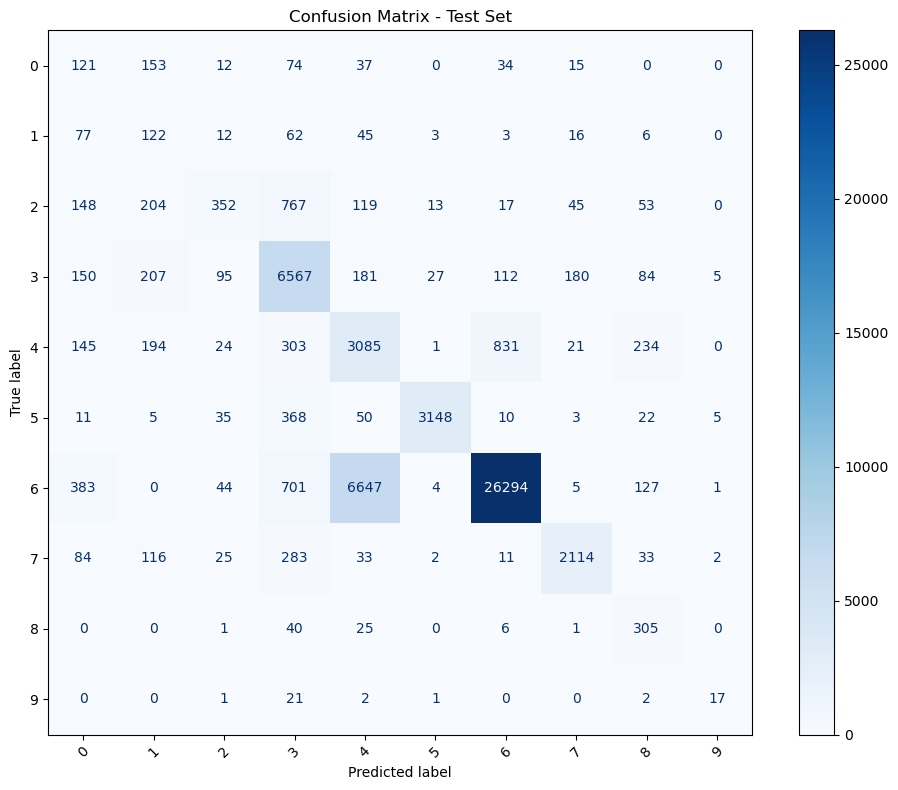

In [ ]:

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
ax.set_title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

### HYPERPARAMETER TUNING

In [60]:
# Prepare features and target
X = df1.drop(columns=['attack_cat'])
y = df1['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define your columns
cat = [col for col in X_train.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Preprocessing transformer
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat),
        ('num', StandardScaler(), numerical),
        ('bin', 'passthrough', binary)
    ]
)

# Pipeline with XGBClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Hyperparameter grid
param_grid = {
    'clf__max_depth': [4, 5],
    'clf__n_estimators': [100, 150],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='recall_weighted',
    n_jobs=-1,
    verbose=1
)
# Fit grid search
grid_search.fit(X_train, y_train)

# Best pipeline
best_model = grid_search.best_estimator_

# Predict on train, val, and test sets
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)

X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']
y_pred_test = best_model.predict(X_test)

# Classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred_val))

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Weighted recall scores
train_recall = recall_score(y_train, y_pred_train, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')

print(f"\nTraining Recall : {train_recall:.4f}")
print(f"Validation Recall : {val_recall:.4f}")
print(f"Test Recall : {test_recall:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Lyster\Documents\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:54] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.56      0.35      1196
           1       0.36      0.37      0.37      1151
           2       0.63      0.26      0.37      2855
           3       0.84      0.89      0.86     14879
           4       0.75      0.79      0.77     12110
           5       0.99      0.88      0.93      3136
           6       0.95      0.93      0.94     38917
           7       0.85      0.79      0.82      5641
           8       0.75      0.87      0.80       818
           9       0.92      1.00      0.96        95

    accuracy                           0.85     80798
   macro avg       0.73      0.73      0.72     80798
weighted avg       0.86      0.85      0.85     80798


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.24      0.16       398
           1       0.22      0.22      0.22       384
           

The tuned XGBoost model demonstrates slightly better performance than the untuned version, with strong results on both the training and validation sets. Among all models evaluated so far, it shows the best generalization capability


### Lime for Tuned XGBoost

In [ ]:
# ...existing code...

# Get feature names after preprocessing
feature_names = (
    numerical +
    list(best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names(cat)) +
    binary
)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(best_model.named_steps['preprocessor'].transform(X_train)),
    feature_names=feature_names,
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)

# Pick a test instance to explain
i = 0  # index of the test sample to explain
test_instance = X_test.iloc[i:i+1]
test_instance_transformed = best_model.named_steps['preprocessor'].transform(test_instance)

# Explain prediction
exp = explainer.explain_instance(
    data_row=test_instance_transformed[0],
    predict_fn=best_model.named_steps['clf'].predict_proba
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

LIME Explanation for Index 0
The LIME visualization explains the model’s prediction for a specific test instance (index 0). The predicted class is “1” (malicious) with a probability of 100%.

The green bar shows features that positively contributed to the prediction (pushed it toward class 1).

The red bar would have shown features that reduced the likelihood of class 1, but in this case, all contributions supported the prediction.

The top contributing features include:

ct_state_ttl <= 0.00

state_CON <= 0.00

ct_dst_sport_ltm <= 0.00

These features had the highest local importance in pushing the prediction toward class 1 (malicious).

### Tuned Confusion Matrix


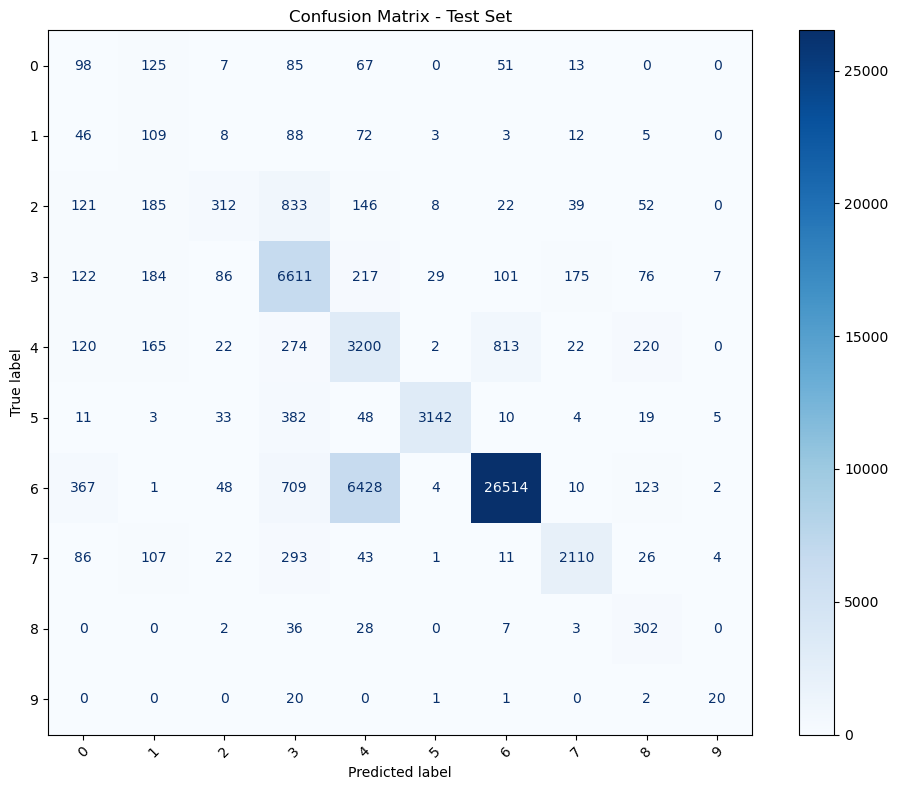

In [ ]:

# Compute confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test, labels=best_model.named_steps['clf'].classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.named_steps['clf'].classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
ax.set_title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()


## Tuned XGB
#The image above contains **2 axes**:

  * The **main axis** is the confusion matrix heatmap.
  * The **second axis** is the color bar on the right, showing the color intensity scale (value magnitude).

###  Key Observations

**Diagonal dominance:**
The largest values are along the diagonal, which is good. It means most predictions were correct.

**Class 6:**

* Has very strong performance: 26,514 correct predictions (true positives), far more than any off-diagonal values in that row.
* Misclassifications mostly happen to class 4 and class 3, but are relatively low in comparison.

**Class 3 and 4:**
These show a moderate amount of confusion with neighboring classes (notably class 6 and class 5).

**Classes 8 and 9:**
Appear to have very low sample sizes, with fewer total instances and some misclassifications. This might indicate class imbalance.



## NEURAL NETWORK

In [ ]:

# Step 1: Encode target labels
# le = LabelEncoder()
# df1['attack_cat'] = le.fit_transform(df1['attack_cat'])

# # Step 2: Clean and validate test_df
# test_df = test_df[test_df['attack_cat'].isin(le.classes_)]
# if test_df.empty:
#     raise ValueError("Error: test_df has 0 valid samples after label filtering!")

test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])

# Step 3: Split features and labels
# X = df1.drop(columns=['attack_cat'])
# y = df1['attack_cat']
X_test = test_df.drop(columns=['attack_cat'])
y_test = test_df['attack_cat']

# Step 4: Identify column types
cat = [col for col in X.select_dtypes(include=['object']).columns]
binary = ['is_ftp_login', 'is_sm_ips_ports']
numerical = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in binary]

# Step 5: Define preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
    ('bin', 'passthrough', binary)
])

# Step 6: Transform features
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

# Step 7: Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: One-hot encode targets
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Step 9: Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.Recall(name='recall')]
)

# Step 10: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


C:\Users\Lyster\AppData\Local\Temp\ipykernel_9800\3907813839.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['attack_cat'] = le.fit_transform(test_df['attack_cat'])


Epoch 1/50
2694/2694 [==============================] - 16s 5ms/step - loss: 0.7530 - recall: 0.6074 - val_loss: 0.6306 - val_recall: 0.6733
Epoch 2/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.6394 - recall: 0.6671 - val_loss: 0.5983 - val_recall: 0.7033
Epoch 3/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.6084 - recall: 0.6905 - val_loss: 0.5721 - val_recall: 0.7072
Epoch 4/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.5901 - recall: 0.7017 - val_loss: 0.5597 - val_recall: 0.7184
Epoch 5/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.5776 - recall: 0.7086 - val_loss: 0.5568 - val_recall: 0.7213
Epoch 6/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.5702 - recall: 0.7127 - val_loss: 0.5439 - val_recall: 0.7250
Epoch 7/50
2694/2694 [==============================] - 13s 5ms/step - loss: 0.5639 - recall: 0.7176 - val_loss: 0.5362 - val_recall: 0.7323
Epoch 8/50
26

In [ ]:


# Step 11: Predict classes
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test_processed), axis=1)

# Step 12: Decode one-hot true labels back to integers
y_train_true = np.argmax(y_train_cat, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

# Step 13: Print classification report on test set
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test_true, y_test_pred))

# Step 14: Print recall scores using weighted average
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
val_recall = recall_score(y_val_true, y_val_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')

print(f"Train Recall (weighted): {train_recall:.4f}")
print(f"Validation Recall (weighted): {val_recall:.4f}")
print(f"Test Recall (weighted): {test_recall:.4f}")


1749/1749 [==============================] - 4s 2ms/step
=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       446
           1       0.24      0.01      0.02       346
           2       0.62      0.06      0.10      1718
           3       0.69      0.82      0.75      7608
           4       0.24      0.75      0.36      4838
           5       1.00      0.81      0.89      3657
           6       0.98      0.69      0.81     34206
           7       0.63      0.81      0.71      2703
           8       0.23      0.60      0.33       378
           9       1.00      0.09      0.17        44

    accuracy                           0.70     55944
   macro avg       0.56      0.46      0.42     55944
weighted avg       0.83      0.70      0.73     55944

Train Recall (weighted): 0.7925
Validation Recall (weighted): 0.7854
Test Recall (weighted): 0.6957



The model generalizes reasonably well from training to validation and test sets.A slight drop in test recall compared to training/validation  but overall performance is stable.

Class 6 and Class 5 are learned very well due to their high support and strong recall/precision.

Classes 0, 1, 2, 9 are underperforming, likely due to class imbalance (low support) and poor separability.


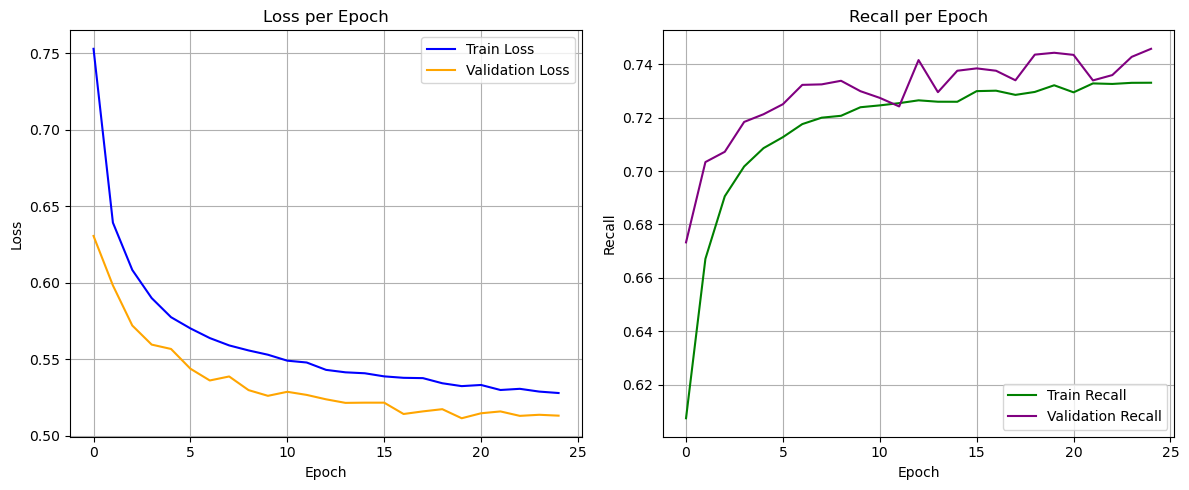

In [ ]:

# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Recall plot (train, val, test)
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Train Recall', color='green')
plt.plot(history.history['val_recall'], label='Validation Recall', color='purple')

plt.title('Recall per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Training and loss of the neural networks

#📉 Loss per Epoch (Left Plot)
Observation: Both the training loss (blue) and validation loss (orange) steadily decrease as the number of epochs increases.

Interpretation:

This means that your model is learning effectively: it’s improving its ability to minimize error with each epoch.

Early on (first 5–10 epochs), the loss decreases sharply, showing rapid learning.

After around epoch 15–20, the loss starts to flatten, indicating the model is converging and learning slows down.

There is no sign of overfitting, as validation loss also keeps decreasing along with training loss.

📈 Recall per Epoch (Right Plot)
Observation: Both training recall (green) and validation recall (purple) increase over epochs.

Recall starts lower (around 0.61 for training, 0.69 for validation) and improves consistently up to ~0.74–0.75.

Interpretation:

The model is getting better at correctly identifying positive samples (i.e., reducing false negatives).

Like loss, recall improves rapidly in the early epochs and then stabilizes as training progresses.

Validation recall remains consistently higher than training recall, suggesting the model is generalizing well without overfitting.


### Stacked Bar Chart

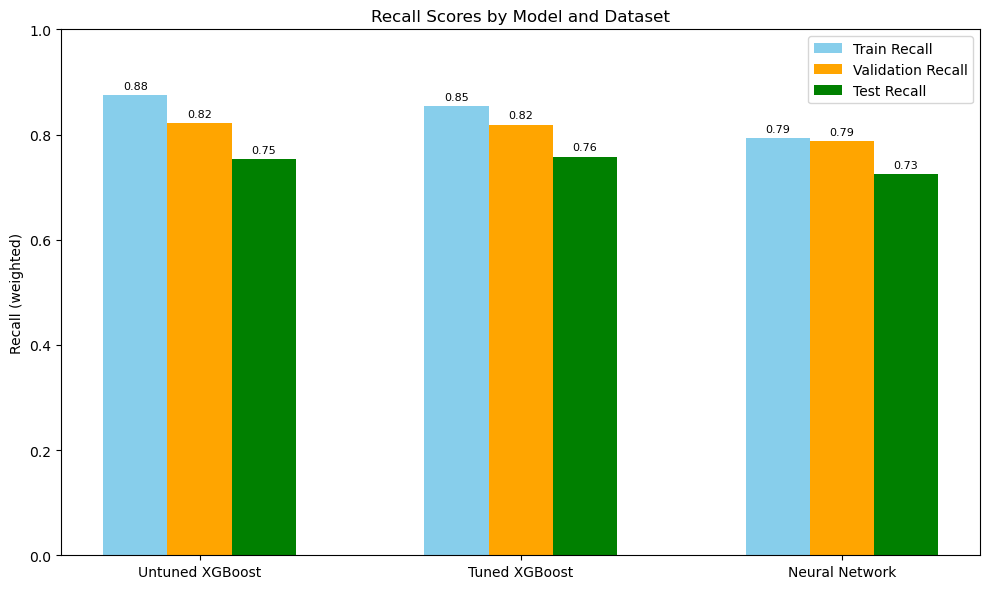

In [ ]:

# Recall values
untuned_train_recall = 0.8755
untuned_val_recall = 0.8216
untuned_test_recall = 0.7530

tuned_train_recall = 0.8540
tuned_val_recall = 0.8190
tuned_test_recall = 0.7582

nn_train_recall = 0.7937
nn_val_recall = 0.7871
nn_test_recall = 0.7253

# Model labels
models = ['Untuned XGBoost', 'Tuned XGBoost', 'Neural Network']

# Recall values grouped by type
train_recalls = [untuned_train_recall, tuned_train_recall, nn_train_recall]
val_recalls = [untuned_val_recall, tuned_val_recall, nn_val_recall]
test_recalls = [untuned_test_recall, tuned_test_recall, nn_test_recall]

# Bar positioning
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, train_recalls, width, label='Train Recall', color='skyblue')
bars2 = ax.bar(x, val_recalls, width, label='Validation Recall', color='orange')
bars3 = ax.bar(x + width, test_recalls, width, label='Test Recall', color='green')

# Labels and formatting
ax.set_ylabel('Recall (weighted)')
ax.set_title('Recall Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Annotate each bar with value
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Stacked Bar Chart**
From the stacked bar chart comparing the three models, we observe that the untuned XGBoost performs reasonably well, the logistic regression model (our baseline) also shows solid results, but the tuned XGBoost outperforms both. Therefore, we will proceed with model interpretability using the tuned XGBoost, as it has demonstrated the best performance so far.

